# Исследовательский анализ данных и проверка гипотез о бронировании билетов сервиса Яндекс Афиша с 1 июня 2024 года по 31 октября 2024 года.

### Выполнила Васильева Ирина 9.09.2025

### Содержание:
1. Введение
2. Загрузка данных и знакомство с ними
3. Предобработка данных и подготовка их к исследованию
4. Исследовательский анализ данных:
 4.1. Анализ распределения заказов по сегментам и их сезонные изменения
 4.2. Осенняя активность пользователей
 4.3. Популярные события и партнёры
5. Статистический анализ данных
6. Общий вывод и рекомендации

## Введение

Коллеги из продуктового отдела сервиса Яндекс Афиша заметили общее изменение в пользовательском спросе. Причины этого пока неясны. Сработал фактор сезонности, и пользователи поменяли предпочтения? Или изменилась аудитория? Стоит также разобраться, какие события стали привлекать больше зрителей, а какие организаторы и площадки выбились в лидеры. А также понять, отличаются ли своей активностью пользователи мобильных устройств от клиентов, которые бронируют билеты со стационарного компьютера.
Проведем исследовательский анализ данных Яндекс Афиши с 1 июня 2024 года по 31 октября 2024 года,чтобы дать ответы на вопросы коллег.

##  Загрузка данных и знакомство с ними

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
orders_url = 'https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv'

orders_df = pd.read_csv(orders_url)

print("Orders dataset:")
display(orders_df.head())


Orders dataset:


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [3]:
events_url = 'https://code.s3.yandex.net/datasets/final_tickets_events_df.csv'
events_df = pd.read_csv(events_url)
print("Events dataset:")
display(events_df.head())

Events dataset:


,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [4]:
print(orders_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

Приведем 2 колонки с датами к типу дата. Остальные колонки соответствуют, пропусков нет, кроме days_since_prev.

In [5]:
orders_df['created_dt_msk'] = pd.to_datetime(orders_df['created_dt_msk'])
orders_df['created_ts_msk'] = pd.to_datetime(orders_df['created_ts_msk'])
print(orders_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   order_id               290849 non-null  int64         
 1   user_id                290849 non-null  object        
 2   created_dt_msk         290849 non-null  datetime64[ns]
 3   created_ts_msk         290849 non-null  datetime64[ns]
 4   event_id               290849 non-null  int64         
 5   cinema_circuit         290849 non-null  object        
 6   age_limit              290849 non-null  int64         
 7   currency_code          290849 non-null  object        
 8   device_type_canonical  290849 non-null  object        
 9   revenue                290849 non-null  float64       
 10  service_name           290849 non-null  object        
 11  tickets_count          290849 non-null  int64         
 12  total                  290849 non-null  floa

In [6]:
print(events_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB
None


Типы данных в датафрейме events соответствуют назначению. Пропусков нет.

## Предобработка данных и подготовка их к исследованию

In [7]:
# Присоединяем таблицу для конвертации валюты
tenge_url = 'https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv'

tenge_df = pd.read_csv(tenge_url)

tenge_df['created_dt_msk'] = pd.to_datetime(tenge_df['data']).dt.date

# Код ревьюера
tenge_df['created_dt_msk'] = pd.to_datetime(tenge_df['created_dt_msk']) 

tenge_df = tenge_df.rename(columns={'curs': 'kzt_rub_rate'})[['created_dt_msk','kzt_rub_rate']]

orders_df = orders_df.merge(tenge_df, on='created_dt_msk', how='left')

In [8]:
## Создадим новоую колонку для расчета выручки в рублях
def convert_to_rub(row):
    if row['currency_code'] == 'kzt':
        return row['revenue'] * row['kzt_rub_rate'] / 100
    else:
        return row['revenue']

orders_df['revenue_rub'] = orders_df.apply(convert_to_rub, axis=1)

orders_df['one_ticket_revenue_rub'] = orders_df['revenue_rub'] / orders_df['tickets_count']


In [9]:
## Выделим месяц и сезоны
orders_df['month'] = pd.to_datetime(orders_df['created_dt_msk']).dt.month
def get_season(month):
    if month >= 3 and month <= 5:
        return 'весна'
    elif month >= 6 and month <= 8:
        return 'лето'
    elif month >= 9 and month <= 11:
        return 'осень'
    else:  # 12, 1, 2
        return 'зима'

orders_df['season'] = orders_df['month'].apply(get_season)
display(orders_df.head())

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,kzt_rub_rate,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,18.6972,1521.94,380.4850,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,18.3419,289.45,144.7250,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,19.6475,1258.57,314.6425,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,18.5010,8.49,4.2450,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,19.6648,1390.41,463.4700,10,осень


In [10]:
## Объединим данные
full_df = orders_df.merge(events_df, on='event_id', how='left')
display(full_df.head())
print(f"\nОбщее количество заказов после объединения: {len(full_df)}")
print(f"Количество уникальных мероприятий: {full_df['event_id'].nunique()}")
print(f"Количество уникальных регионов: {full_df['region_name'].nunique()}")
print(f"Количество уникальных партнеров: {full_df['organizers'].nunique()}")

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"



Общее количество заказов после объединения: 290849
Количество уникальных мероприятий: 22446
Количество уникальных регионов: 81
Количество уникальных партнеров: 4293


In [11]:
print(full_df['revenue'].mean())
print(full_df['revenue_rub'].mean())

625.0830544371823
555.1279716611334


Все датафреймы объеденены и приведены к единой валюте. Добавлены новые колонки revenue_rub выручка в единой валюте, one_ticket_revenue_rub выручка с 1 билета, month месяц, season сезон.

In [12]:

cols_critical = ['event_name', 'city_name', 'region_name', 
                 'organizers', 'event_type_main', 'event_type_description', 'city_id']

full_df_filtered = full_df.dropna(subset=cols_critical)

missing_summary_after = full_df_filtered[cols_critical].isna().sum()
print(missing_summary_after[missing_summary_after > 0])

print(f"\nРазмер данных после удаления строк с NaN (кроме days_since_prev): {len(full_df_filtered)}")


Series([], dtype: int64)

Размер данных после удаления строк с NaN (кроме days_since_prev): 290611


Удалено 238 строк данных, 0,08% где нет информации о событиях

In [13]:
exact_duplicates = full_df_filtered[full_df_filtered.duplicated()]
print(f"Явных дубликатов строк: {len(exact_duplicates)}")

cols_for_logical_duplicates = ['user_id', 'event_id', 'created_dt_msk', 'tickets_count', 'revenue_rub']

logical_duplicates = full_df_filtered[full_df_filtered.duplicated(subset=cols_for_logical_duplicates, keep=False)]
print(f"Неявных дубликатов по бронированию билета: {len(logical_duplicates)}")


Явных дубликатов строк: 0
Неявных дубликатов по бронированию билета: 86451


In [14]:
# Анализ неявных дубликатов
cols_for_logical_duplicates = [
    'user_id', 
    'event_id', 
    'created_dt_msk', 
    'tickets_count', 
    'revenue_rub',
    'device_type_canonical',   
    'service_name',            
    'total'                    
]

logical_duplicates = full_df_filtered[
    full_df_filtered.duplicated(subset=cols_for_logical_duplicates, keep=False)
]

print(f"Неявных дубликатов по уточнённым признакам: {len(logical_duplicates)}")


Неявных дубликатов по уточнённым признакам: 83761


In [15]:
sample_duplicates = logical_duplicates.sort_values(['user_id', 'event_id', 'created_dt_msk']).head(7)
display(sample_duplicates)


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
9,6818017,000cf0659a9f40f,2024-06-20,2024-06-20 10:35:26,516728,нет,12,rub,mobile,1421.91,...,11be386f-7cb7-4aa1-a8e4-ba73a29c1af2,концерт,концерты,№1756,Широковская область,Радужнополье,35.0,4471.0,"Киновидеостудия ""Тон"" и партнеры","ул. Тихая, д. 69 стр. 669"
11,6818249,000cf0659a9f40f,2024-06-20,2024-06-20 10:49:48,516728,нет,12,rub,mobile,710.95,...,11be386f-7cb7-4aa1-a8e4-ba73a29c1af2,концерт,концерты,№1756,Широковская область,Радужнополье,35.0,4471.0,"Киновидеостудия ""Тон"" и партнеры","ул. Тихая, д. 69 стр. 669"
12,6818220,000cf0659a9f40f,2024-06-20,2024-06-20 10:56:16,516728,нет,12,rub,mobile,1421.91,...,11be386f-7cb7-4aa1-a8e4-ba73a29c1af2,концерт,концерты,№1756,Широковская область,Радужнополье,35.0,4471.0,"Киновидеостудия ""Тон"" и партнеры","ул. Тихая, д. 69 стр. 669"
13,6818075,000cf0659a9f40f,2024-06-20,2024-06-20 12:42:12,516728,нет,12,rub,mobile,1421.91,...,11be386f-7cb7-4aa1-a8e4-ba73a29c1af2,концерт,концерты,№1756,Широковская область,Радужнополье,35.0,4471.0,"Киновидеостудия ""Тон"" и партнеры","ул. Тихая, д. 69 стр. 669"
14,6818191,000cf0659a9f40f,2024-06-20,2024-06-20 10:51:10,516728,нет,12,rub,mobile,1421.91,...,11be386f-7cb7-4aa1-a8e4-ba73a29c1af2,концерт,концерты,№1756,Широковская область,Радужнополье,35.0,4471.0,"Киновидеостудия ""Тон"" и партнеры","ул. Тихая, д. 69 стр. 669"
15,6818046,000cf0659a9f40f,2024-06-20,2024-06-20 12:40:27,516728,нет,12,rub,mobile,1421.91,...,11be386f-7cb7-4aa1-a8e4-ba73a29c1af2,концерт,концерты,№1756,Широковская область,Радужнополье,35.0,4471.0,"Киновидеостудия ""Тон"" и партнеры","ул. Тихая, д. 69 стр. 669"
16,6818104,000cf0659a9f40f,2024-06-20,2024-06-20 12:46:11,516728,нет,12,rub,mobile,710.95,...,11be386f-7cb7-4aa1-a8e4-ba73a29c1af2,концерт,концерты,№1756,Широковская область,Радужнополье,35.0,4471.0,"Киновидеостудия ""Тон"" и партнеры","ул. Тихая, д. 69 стр. 669"


In [16]:
# --- ШАГ 1. Определим два набора дублей ---
# «широкие» дубли (по первым признакам)
cols_basic = ['user_id', 'event_id', 'created_dt_msk', 'tickets_count', 'revenue_rub']
dup_basic = full_df_filtered[full_df_filtered.duplicated(subset=cols_basic, keep=False)]

# «уточнённые» дубли (с устройством, партнёром и total)
cols_extended = cols_basic + ['device_type_canonical', 'service_name', 'total']
dup_extended = full_df_filtered[full_df_filtered.duplicated(subset=cols_extended, keep=False)]

# --- ШАГ 2. Найдём «разницу» = те самые 3000 строк ---
diff_df = pd.concat([dup_basic, dup_extended]).drop_duplicates(keep=False)

print(f"Количество строк в diff_df: {len(diff_df)}")

# --- ШАГ 3. Посмотрим распределение по пользователям ---
user_diff = diff_df.groupby("user_id")['order_id'].count().reset_index()
user_diff.rename(columns={'order_id':'n_suspicious_orders'}, inplace=True)

print(f"Уникальных пользователей с расхождениями: {user_diff['user_id'].nunique()}")
print("\nТОП-10 пользователей с наибольшим числом таких заказов:")
display(user_diff.sort_values(by='n_suspicious_orders', ascending=False).head(10))


Количество строк в diff_df: 2690
Уникальных пользователей с расхождениями: 718

ТОП-10 пользователей с наибольшим числом таких заказов:


,user_id,n_suspicious_orders
32,0beb8fc0c0a9ce1,147
72,18e9aead0a393e7,66
199,3ee7dc2e115847f,48
82,1c2a2133e1df1b4,40
378,8187dac4be757a0,39
366,7eb4fc207ecc10f,35
216,44c1c640a242aea,33
6,02ea4583333f064,30
246,4ec8f6429431987,30
324,6cf5aff356429e5,29


In [17]:
# Оставляем по одному заказу для каждого пользователя с расхождениями
one_order_per_user = diff_df.groupby('user_id').first().reset_index()

# Объединяем с остальными строками
remaining_df = full_df_filtered[~full_df_filtered['order_id'].isin(diff_df['order_id'])]

final_df = pd.concat([remaining_df, one_order_per_user], ignore_index=True)

print(f"Общее количество строк после обработки неявных дубликатов: {len(final_df)}")


Общее количество строк после обработки неявных дубликатов: 288639


Явных дубликатов нет. Неявные дубликаты есть, 2690 строк. Это пользователи, которые  совершали по несколько заказов на 1 мероприятие в 1 день. Чтобы избежать искажений в дальнейшем анализе данных, для таких пользователей оставлен 1 заказ.

In [18]:
# Категориальные и количественные столбцы 
categorical_cols = ['currency_code', 'device_type_canonical', 'season', 
                    'event_type_main', 'organizers', 'region_name', 'city_name']
quantitative_cols = ['revenue', 'tickets_count', 'revenue_rub', 'one_ticket_revenue_rub']

# Нормализация категориальных данных
for col in ['device_type_canonical', 'currency_code', 'season']:
    if col in final_df.columns:
        final_df.loc[:, col] = full_df[col].str.lower().str.strip()

In [19]:
# Анализ категориальных данных 
print("Категориальные признаки:\n")
for col in categorical_cols:
    if col in final_df.columns:
        print(f"Столбец: {col}")
        print(final_df[col].value_counts(dropna=False))
        print("\n")
    else:
        print(f"Столбец {col} отсутствует в данных.\n")

Категориальные признаки:

Столбец: currency_code
rub    283637
kzt      5002
Name: currency_code, dtype: int64


Столбец: device_type_canonical
mobile     230905
desktop     57734
Name: device_type_canonical, dtype: int64


Столбец: season
осень    168461
лето     120178
Name: season, dtype: int64


Столбец: event_type_main
концерты    114460
театр        66714
другое       65572
спорт        21739
стендап      13325
выставки      4843
ёлки          1986
Name: event_type_main, dtype: int64


Столбец: organizers
№1531    9656
№2121    4682
№4054    4312
№4549    3922
№4837    3337
         ... 
№4940       1
№2150       1
№2712       1
№2702       1
№2362       1
Name: organizers, Length: 4292, dtype: int64


Столбец: region_name
Каменевский регион          90283
Североярская область        43804
Широковская область         16359
Медовская область           13782
Озернинский край            10363
                            ...  
Лесноярский край               19
Крутоводский регион    

Категорийный данные без особенностей, пропусков нет.

Статистика для revenue:
count    288639.000000
mean        624.258409
std        1224.456808
min         -90.760000
1%            0.000000
25%         116.790000
50%         355.060000
75%         808.670000
99%        3891.660000
max       81174.540000
Name: revenue, dtype: float64


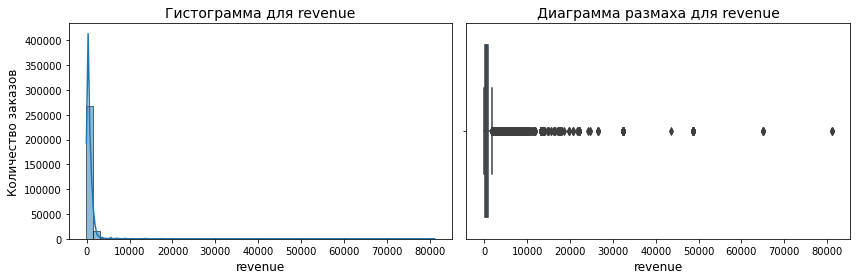

Статистика для tickets_count:
count    288639.000000
mean          2.754510
std           1.170898
min           1.000000
1%            1.000000
25%           2.000000
50%           3.000000
75%           4.000000
99%           6.000000
max          57.000000
Name: tickets_count, dtype: float64


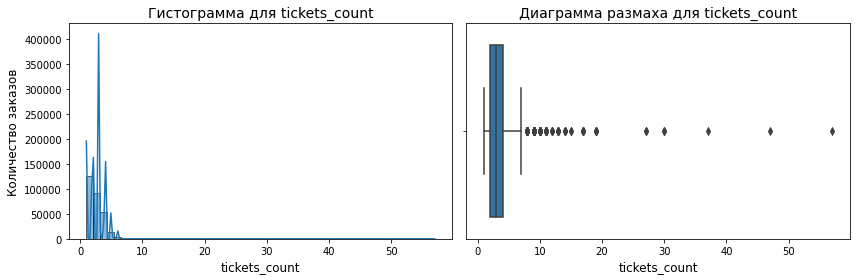

Статистика для revenue_rub:
count    288639.000000
mean        555.010660
std         877.000922
min         -90.760000
1%            0.000000
25%         113.710000
50%         349.940000
75%         801.960000
99%        2628.421739
max       81174.540000
Name: revenue_rub, dtype: float64


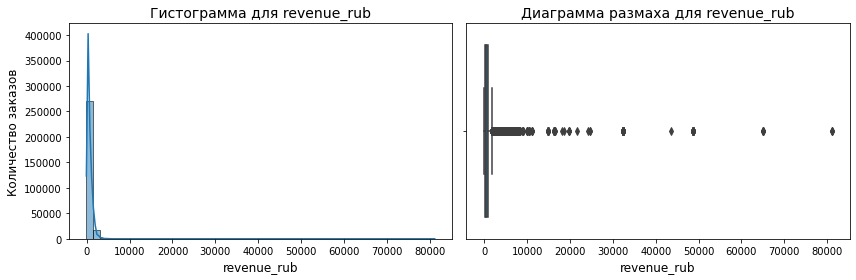

Статистика для one_ticket_revenue_rub:
count    288639.000000
mean        200.985745
std         303.498821
min         -18.152000
1%            0.000000
25%          46.820000
50%         149.396667
75%         308.380000
99%         772.500000
max       21757.540000
Name: one_ticket_revenue_rub, dtype: float64


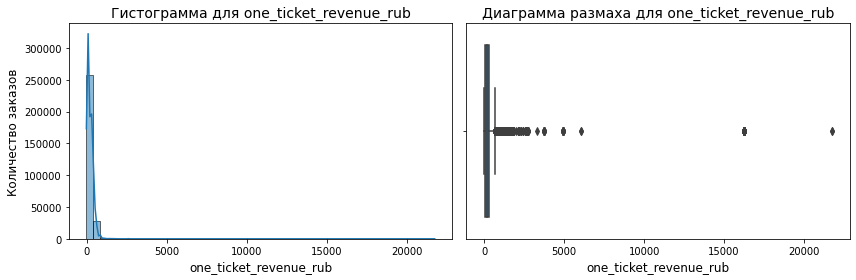

In [20]:
# Анализ количественных данных
for col in quantitative_cols:
    print(f"Статистика для {col}:")
    print(final_df[col].describe(percentiles=[0.01,0.25,0.5,0.75,0.99]))
    
    plt.figure(figsize=(12,4))
    
    # Гистограмма
    plt.subplot(1,2,1)
    sns.histplot(final_df[col], bins=50, kde=True)
    plt.title(f"Гистограмма для {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Количество заказов", fontsize=12)
    
    # Диаграмма размаха
    plt.subplot(1,2,2)
    sns.boxplot(x=final_df[col])
    plt.title(f"Диаграмма размаха для {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    
    plt.tight_layout()
    plt.show()


revenue (сумма заказа в исходной валюте)
min = -90.76 встречаются отрицательные значения, их нужно удалить или исправить.
max = 81 174.54, 99-й процентиль = 4 000.19 есть крупные выбросы.
median = 355.34, mean = 625.08 среднее выше медианы из-за выбросов.
Вывод: данные сильно скошены вправо. Для анализа полезно фильтровать по 99-му процентилю, чтобы убрать экстремальные заказы.
tickets_count (количество билетов)
min = 1, max = 57, median = 3, mean = 2.75
1% квантиль = 1, 99% квантиль = 6 редкие заказы с большим количеством билетов (выбросы)
Вывод: большая часть заказов - 1-6 билетов, редкие крупные покупки могут сильно влиять на средние значения выручки.
revenue_rub (выручка в рублях)
min = -90.76, 99-й процентиль = 2 628.42, max = 81 174.54
Присутствуют отрицательные значения их нужно удалить.
median = 350.26, mean = 555.13 выборка с сильным правым хвостом.
Вывод: после конвертации в рубли ситуация с выбросами сохранилась, требуется фильтрация по 99-му процентилю и удаление отрицательных.
one_ticket_revenue_rub (выручка с одного билета)
min = -18.15, median = 149.46, mean = 201.03, 99-й процентиль = 772.5, max = 21 757.54
Отрицательные и очень большие значения выбросы.
Вывод: для анализа средней стоимости билета рекомендуется исключить отрицательные значения и использовать фильтр по 99-му процентилю.

In [21]:
# Определяем 99-й процентиль выручки по валютам
revenue_rub_99 = final_df[final_df['currency_code']=='rub']['revenue'].quantile(0.99)
revenue_kzt_99 = final_df[final_df['currency_code']=='kzt']['revenue'].quantile(0.99)

# Фильтруем данные, оставляя только заказы до 99-го процентиля
final_df = final_df[
    ((final_df['currency_code']=='rub') & (final_df['revenue'] <= revenue_rub_99)) |
    ((final_df['currency_code']=='kzt') & (final_df['revenue'] <= revenue_kzt_99))
].copy()

print(f"\nРазмер данных после фильтрации по 99% выручки: {len(final_df)}")



Размер данных после фильтрации по 99% выручки: 285753


In [22]:
final_df = final_df[
    (final_df['revenue'] >= 0) &
    (final_df['revenue_rub'] >= 0) &
    (final_df['one_ticket_revenue_rub'] >= 0)
].copy()

print(f"Размер данных после удаления отрицательных значений: {len(final_df)}")


Размер данных после удаления отрицательных значений: 285375


Проведена полная предобратка данных. Убраны пропуски в ключевых колонках, отрицательные значения в денежных колонках, сильные выбросы, проведена работа над неявными дубликатами. Для исселдовательского анализа осталось 285375 строк чистых данных.

## Исследовательский анализ данных:

1. Анализ распределения заказов по сегментам и их сезонные изменения

- Количество заказов по месяцам

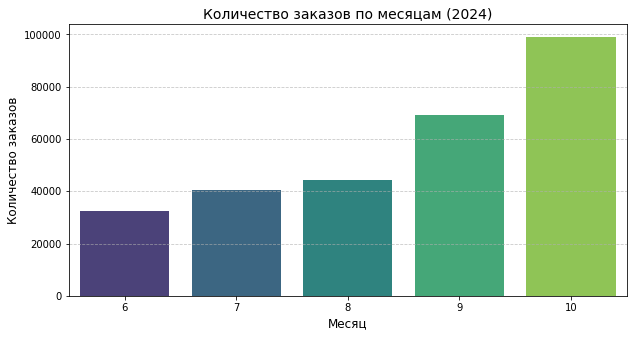

In [23]:
# Группировка по месяцам и подсчет количества заказов
monthly_orders = final_df.groupby('month')['order_id'].count().reset_index()
monthly_orders.rename(columns={'order_id': 'Количество заказов'}, inplace=True)

# Оставляем только месяцы с 6 по 10
monthly_orders = monthly_orders[monthly_orders['month'].between(6, 10)]
plt.figure(figsize=(10,5))
sns.barplot(data=monthly_orders, x='month', y='Количество заказов', palette="viridis")
plt.title("Количество заказов по месяцам (2024)", fontsize=14)
plt.xlabel("Месяц", fontsize=12)
plt.ylabel("Количество заказов", fontsize=12)
plt.xticks(range(0, len(monthly_orders)), monthly_orders['month'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



- Распределение заказов по категориям летом и осенью

В летние месяцы заказов меньше. В июне около 3 тысяч, в августе чуть больше 4. В осенние месяцы значительный рост - в сентябре 7000, в октябре около 10 000 заказов. 

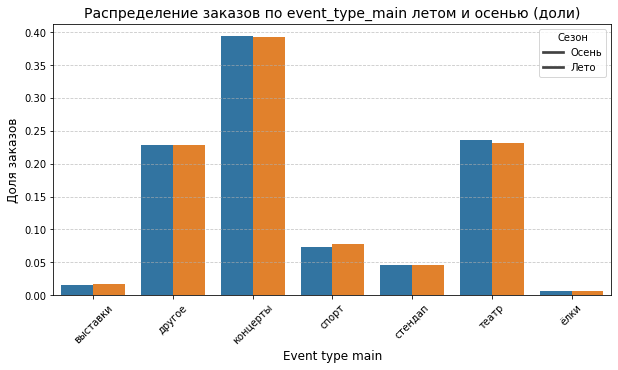

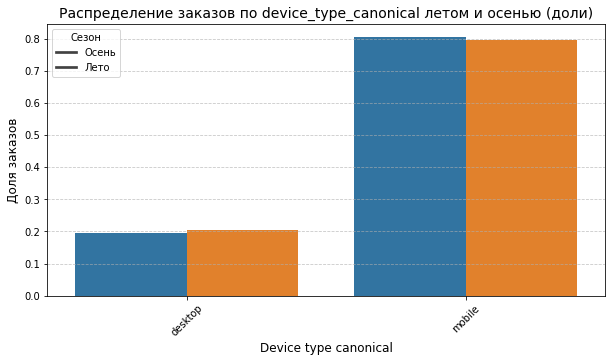

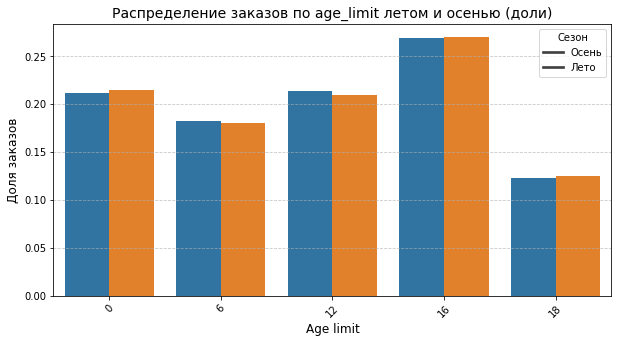

In [24]:
categorical_cols = ['event_type_main', 'device_type_canonical', 'age_limit']

for col in categorical_cols:
    temp = final_df.groupby(['season', col])['order_id'].count().reset_index()
    temp.rename(columns={'order_id': 'Количество заказов'}, inplace=True)
    
    temp['Доля заказов'] = temp.groupby('season')['Количество заказов'].transform(lambda x: x / x.sum())
    
    plt.figure(figsize=(10,5))
    sns.barplot(data=temp, x=col, y='Доля заказов', hue='season', palette=['#1f77b4','#ff7f0e'])
    plt.title(f"Распределение заказов по {col} летом и осенью (доли)", fontsize=14)
    plt.xlabel(col.replace('_', ' ').capitalize(), fontsize=12)
    plt.ylabel("Доля заказов", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Сезон', labels=['Осень', 'Лето'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

По типу мероприятия больше всего концертов(около 40%), театр и другое. Выраженной сезонности нет.
По типу устройства выраженной сезонности нет, около 80% заказов приходят с мобильных устройств.
По возрасту больше всего заказов в группе 16 и 12 лет. Выраженной сезонности нет

- Средняя стоимость билета по типу мероприятия летом и осенью

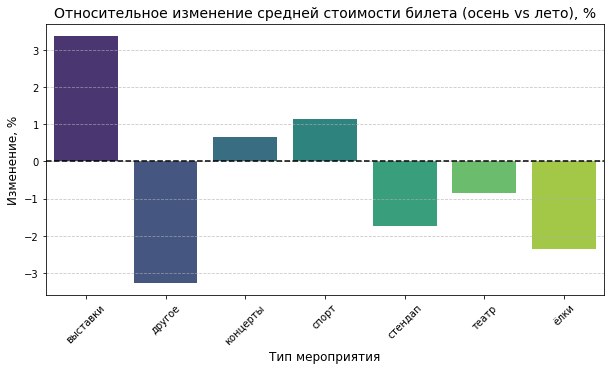

In [25]:

avg_ticket_revenue = final_df.groupby(['season', 'event_type_main'])['one_ticket_revenue_rub'].mean().reset_index()

summer = avg_ticket_revenue[avg_ticket_revenue['season'] == 'лето'].set_index('event_type_main')
autumn = avg_ticket_revenue[avg_ticket_revenue['season'] == 'осень'].set_index('event_type_main')
change = ((autumn['one_ticket_revenue_rub'] - summer['one_ticket_revenue_rub']) / summer['one_ticket_revenue_rub'] * 100).reset_index()
change.rename(columns={'one_ticket_revenue_rub': 'Изменение_%', 'event_type_main':'Тип мероприятия'}, inplace=True)

plt.figure(figsize=(10,5))
sns.barplot(x='Тип мероприятия', y='Изменение_%', data=change, palette='viridis')
plt.title("Относительное изменение средней стоимости билета (осень vs лето), %", fontsize=14)
plt.ylabel("Изменение, %", fontsize=12)
plt.xlabel("Тип мероприятия", fontsize=12)
plt.xticks(rotation=45)
plt.axhline(0, color='black', linestyle='--')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Осенью дороже выставки, спорт и концерты. Остальные мероприятия дороже летом.

2.Осенняя активность пользователей

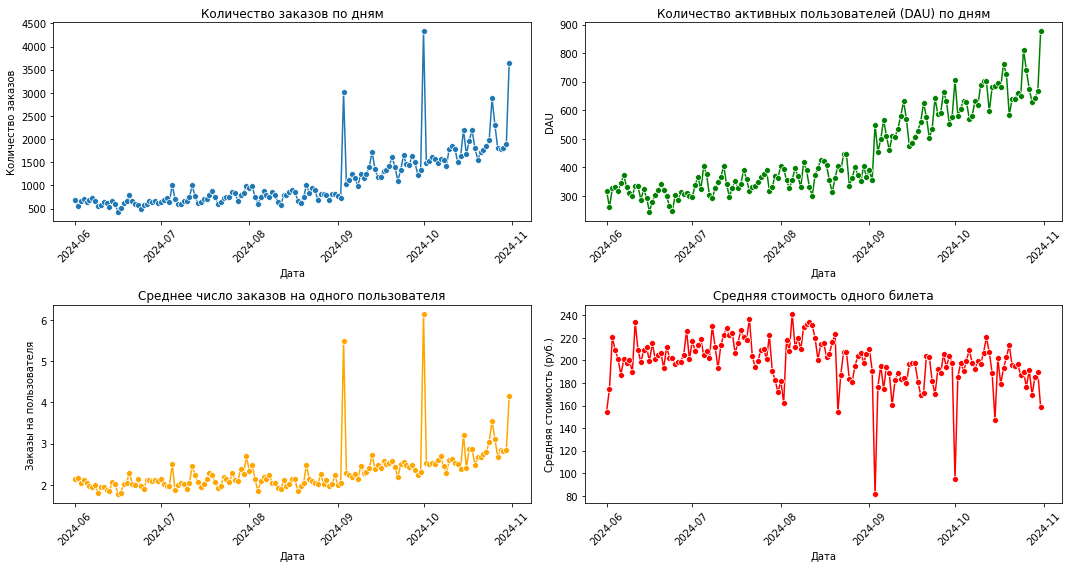

In [26]:
autumn_df = final_df[final_df['season']=='осень'].copy()

autumn_df['день_недели'] = autumn_df['created_dt_msk'].dt.day_name()

daily_stats = autumn_df.groupby('created_dt_msk').agg(
    количество_заказов=('order_id','count'),
    активные_пользователи=('user_id','nunique'),
    средняя_стоимость_билета=('one_ticket_revenue_rub','mean')
).reset_index()

daily_stats['заказы_на_пользователя'] = daily_stats['количество_заказов'] / daily_stats['активные_пользователи']

plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
sns.lineplot(data=daily_stats, x='created_dt_msk', y='количество_заказов', marker='o')
plt.title("Количество заказов по дням")
plt.xlabel("Дата")
plt.ylabel("Количество заказов")
plt.xticks(rotation=45)

plt.subplot(2,2,2)
sns.lineplot(data=daily_stats, x='created_dt_msk', y='активные_пользователи', marker='o', color='green')
plt.title("Количество активных пользователей (DAU) по дням")
plt.xlabel("Дата")
plt.ylabel("DAU")
plt.xticks(rotation=45)

plt.subplot(2,2,3)
sns.lineplot(data=daily_stats, x='created_dt_msk', y='заказы_на_пользователя', marker='o', color='orange')
plt.title("Среднее число заказов на одного пользователя")
plt.xlabel("Дата")
plt.ylabel("Заказы на пользователя")
plt.xticks(rotation=45)

plt.subplot(2,2,4)
sns.lineplot(data=daily_stats, x='created_dt_msk', y='средняя_стоимость_билета', marker='o', color='red')
plt.title("Средняя стоимость одного билета")
plt.xlabel("Дата")
plt.ylabel("Средняя стоимость (руб.)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Пики количества заказов по дням произошли в первых числах сентября и первых числах октября(до 7000 заказов). DAU постепенно растет с 600 в сентябре до около 1000 в октябре, в летние месяцы 300-400. Среднее число заказов на 1 пользователя также было 2 пика в первых числах сентября и октября, около 6.Средняя стоимость билета около 160, есть 2 периода резкого снижения первые числа сентября и октября.

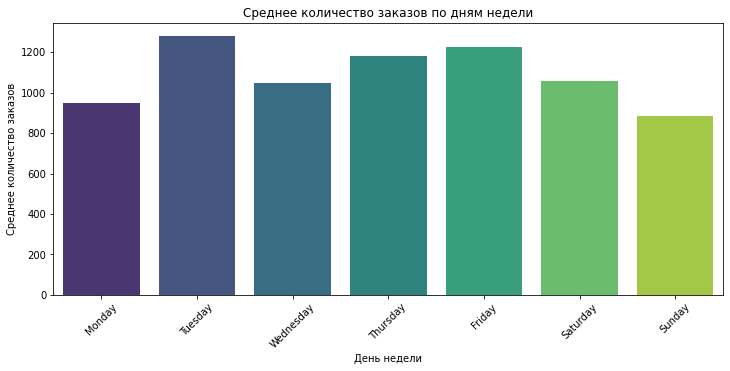

In [27]:
# День недели и выходные
daily_stats['день_недели'] = daily_stats['created_dt_msk'].dt.day_name()
daily_stats['выходной'] = daily_stats['день_недели'].isin(['Saturday', 'Sunday'])

# Сводка по дням недели
weekly_stats = daily_stats.groupby('день_недели').agg(
    среднее_количество_заказов=('количество_заказов','mean'),
    среднее_активные_пользователи=('активные_пользователи','mean'),
    средние_заказы_на_пользователя=('заказы_на_пользователя','mean'),
    средняя_стоимость_билета=('средняя_стоимость_билета','mean')
).reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).reset_index()

plt.figure(figsize=(12,5))
sns.barplot(data=weekly_stats, x='день_недели', y='среднее_количество_заказов', palette='viridis')
plt.title("Среднее количество заказов по дням недели")
plt.xlabel("День недели")
plt.ylabel("Среднее количество заказов")
plt.xticks(rotation=45)
plt.show()



По дням недели больше всего заказов во вторник, четверг и пятницу. Меньше всего в воскресенье.


3. Популярные события и партнёры

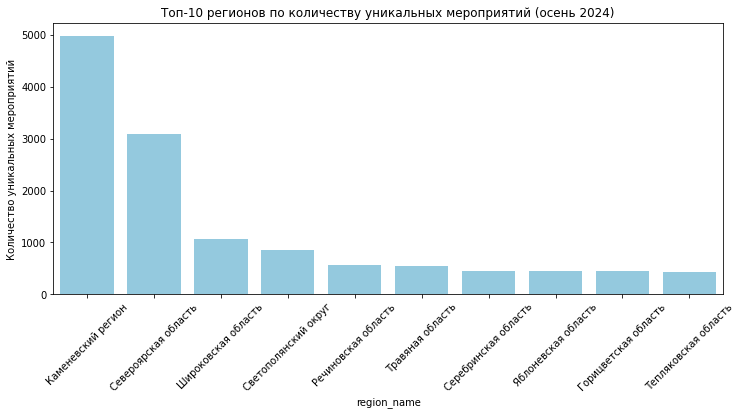

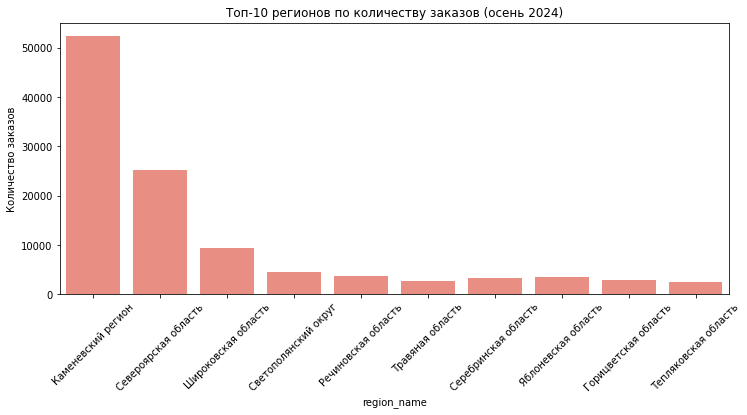

In [28]:
region_stats = autumn_df.groupby('region_name').agg(
    unique_events=('event_id','nunique'),
    orders_count=('order_id','count')
).reset_index()

region_stats['event_share'] = region_stats['unique_events'] / region_stats['unique_events'].sum()
region_stats['orders_share'] = region_stats['orders_count'] / region_stats['orders_count'].sum()

region_stats = region_stats.sort_values(by='unique_events', ascending=False)
region_stats.head(10)
plt.figure(figsize=(12,5))
sns.barplot(data=region_stats.head(10), x='region_name', y='unique_events', color='skyblue')
plt.title("Топ-10 регионов по количеству уникальных мероприятий (осень 2024)")
plt.xticks(rotation=45)
plt.ylabel("Количество уникальных мероприятий")
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(data=region_stats.head(10), x='region_name', y='orders_count', color='salmon')
plt.title("Топ-10 регионов по количеству заказов (осень 2024)")
plt.xticks(rotation=45)
plt.ylabel("Количество заказов")
plt.show()


Больше всего мероприятий осенью проходит в Каменевском регионе(около 5000) и Североярской области(около 3000).Лидеры по количеству заказов теже. В Каменевском регионе около 50000) и Североярской области около 25000.

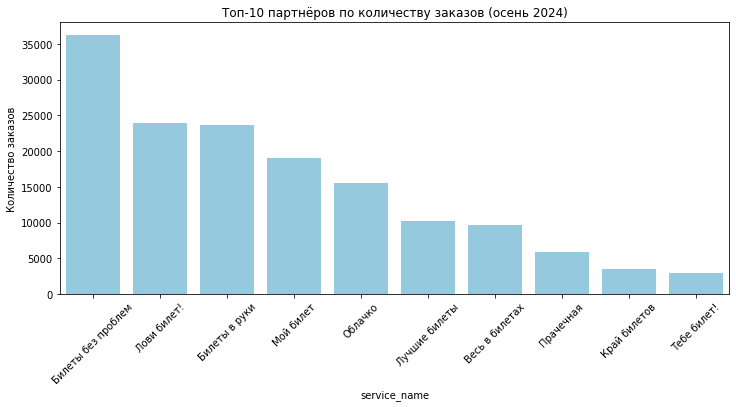

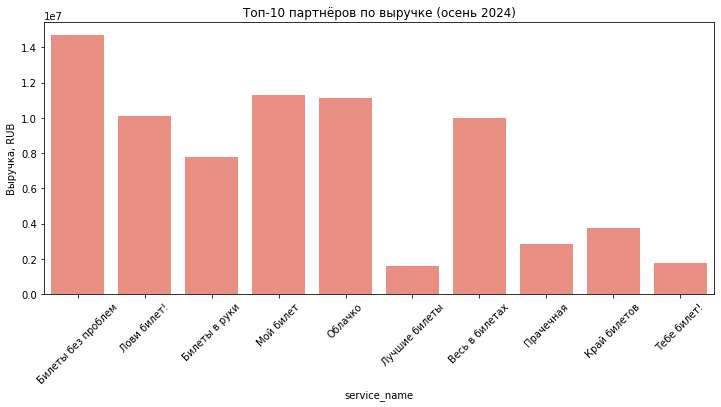

In [29]:
partner_stats = autumn_df.groupby('service_name').agg(
    unique_events=('event_id','nunique'),
    orders_count=('order_id','count'),
    revenue_total=('revenue_rub','sum')
).reset_index()

partner_stats['event_share'] = partner_stats['unique_events'] / partner_stats['unique_events'].sum()
partner_stats['orders_share'] = partner_stats['orders_count'] / partner_stats['orders_count'].sum()
partner_stats['revenue_share'] = partner_stats['revenue_total'] / partner_stats['revenue_total'].sum()

partner_stats = partner_stats.sort_values(by='orders_count', ascending=False)
partner_stats.head(10)
plt.figure(figsize=(12,5))
sns.barplot(data=partner_stats.head(10), x='service_name', y='orders_count', color='skyblue')
plt.title("Топ-10 партнёров по количеству заказов (осень 2024)")
plt.xticks(rotation=45)
plt.ylabel("Количество заказов")
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(data=partner_stats.head(10), x='service_name', y='revenue_total', color='salmon')
plt.title("Топ-10 партнёров по выручке (осень 2024)")
plt.xticks(rotation=45)
plt.ylabel("Выручка, RUB")
plt.show()


Топ-партнеры по количесвту заказов осенью Билеты без проблем, Лови билет и Билеты в руки. По выручке лидер Билеты без проблем, 
также Мой билет и Облачно.

##  Статистический анализ данных

Гипотеза 1: Среднее количество заказов на пользователя

H0 (нулевая): среднее orders_per_user у мобильных пользователей не больше чем у десктопных
H1 (альтернатива): среднее orders_per_user у мобильных пользователей больше чем у десктопных

Гипотеза 2: Среднее время между заказами

H0 (нулевая): среднее время между заказами у мобильных пользователей не выше, чем у десктопных
H1 (альтернатива): среднее время между заказами у мобильных пользователей выше, чем у десктопных

Среднее количество заказов на пользователя:
Медиана мобильных: 2.00, медиана десктопа: 2.00
Среднее мобильных: 11.75, среднее десктопа: 6.64
t-statistic=6.00, p-value=1.0267e-09

Среднее время между заказами:
Медиана мобильных: 7.31, медиана десктопа: 3.50
Среднее мобильных: 15.37, среднее десктопа: 12.21
t-statistic=9.51, p-value=1.1035e-21



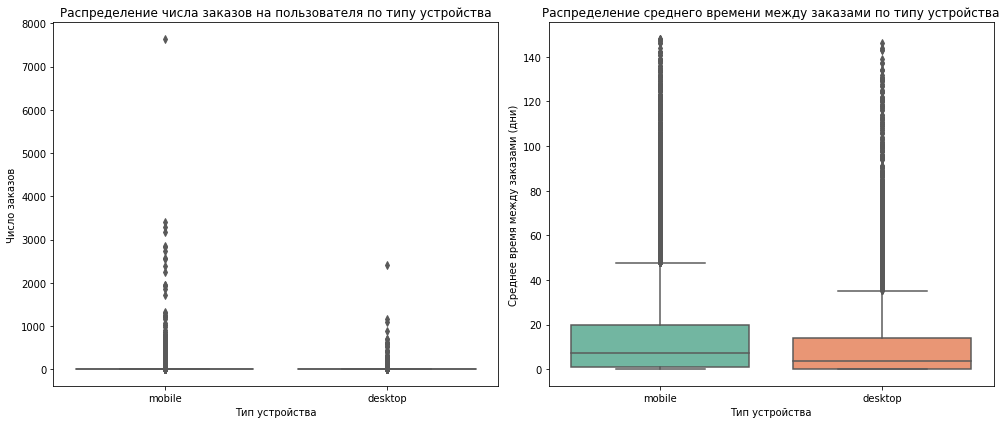

In [30]:
# 1. Подсчёт заказов на пользователя
orders_per_user = final_df.groupby(['user_id','device_type_canonical']).agg(
    orders_count=('order_id','count')
).reset_index()

# 2. Среднее время между заказами
time_between_orders = final_df.groupby(['user_id','device_type_canonical']).agg(
    avg_days_between_orders=('days_since_prev','mean')
).reset_index()

mobile_orders = orders_per_user[orders_per_user['device_type_canonical']=='mobile']['orders_count']
desktop_orders = orders_per_user[orders_per_user['device_type_canonical']=='desktop']['orders_count']

mobile_days = time_between_orders[time_between_orders['device_type_canonical']=='mobile']['avg_days_between_orders'].dropna()
desktop_days = time_between_orders[time_between_orders['device_type_canonical']=='desktop']['avg_days_between_orders'].dropna()

# Гипотеза 1
stat_orders, p_orders = ttest_ind(
    mobile_orders, desktop_orders, 
    equal_var=False, alternative='greater'
)
print("Среднее количество заказов на пользователя:")
print(f"Медиана мобильных: {mobile_orders.median():.2f}, медиана десктопа: {desktop_orders.median():.2f}")
print(f"Среднее мобильных: {mobile_orders.mean():.2f}, среднее десктопа: {desktop_orders.mean():.2f}")
print(f"t-statistic={stat_orders:.2f}, p-value={p_orders:.5g}\n")

# Гипотеза 2:
stat_days, p_days = ttest_ind(
    mobile_days, desktop_days, 
    equal_var=False, alternative='greater'
)
print("Среднее время между заказами:")
print(f"Медиана мобильных: {mobile_days.median():.2f}, медиана десктопа: {desktop_days.median():.2f}")
print(f"Среднее мобильных: {mobile_days.mean():.2f}, среднее десктопа: {desktop_days.mean():.2f}")
print(f"t-statistic={stat_days:.2f}, p-value={p_days:.5g}\n")

# Визуализация
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x='device_type_canonical', y='orders_count', data=orders_per_user, palette=['#66c2a5','#fc8d62'])
plt.title("Распределение числа заказов на пользователя по типу устройства")
plt.xlabel("Тип устройства")
plt.ylabel("Число заказов")

plt.subplot(1,2,2)
sns.boxplot(x='device_type_canonical', y='avg_days_between_orders', data=time_between_orders, palette=['#66c2a5','#fc8d62'])
plt.title("Распределение среднего времени между заказами по типу устройства")
plt.xlabel("Тип устройства")
plt.ylabel("Среднее время между заказами (дни)")

plt.tight_layout()
plt.show()


In [31]:
import statistics

mobile_days_var = statistics.variance(mobile_days)
desktop_days_var = statistics.variance(desktop_days)
print(mobile_days_var, desktop_days_var ) 


494.2660135158039 434.08916857299096


Гипотеза 1. Среднее количество заказов на пользователя
Медиана одинаковая: 2 заказа на пользователя у мобильных и десктопных.
Среднее выше у мобильных: 11.75 против 6.64. Это говорит о том, что есть небольшая группа очень активных мобильных пользователей, которые сильно повышают среднее.
t-тест: t = 6.00, p 1.03e-09 нулевая гипотеза отвергается.
Вывод: мобильные пользователи в среднем совершают больше заказов, чем десктопные.
Гипотеза 2. Среднее время между заказами
Медиана: мобильные – 7.31 дня, десктопные – 3.50 дня.
Среднее: мобильные – 15.37 дня, десктопные – 12.21 дня.
t-тест: t = 9.51, p 1.1035e-211 нулевая гипотеза отвергается.
Вывод: среднее время между заказами у мобильных пользователей выше. То есть мобильные делают больше заказов, но с большей паузой между ними.

## Общий вывод и рекомендации

Проведен анализ данных от сервиса Яндекс Афиша с 2024 год с 1 июня по 31 октября.
Получено 290849 строк данных, в процессе обработки на пропуски, дубли, аномальные значения удалено около 1% данных.
Основные результаты анализа продаж билетов

Динамика по месяцам:
Летние месяцы (июнь-август) - наименьшее количество заказов (3-4 тыс.).
Осень (сентябрь-октябрь) - резкий рост до 7–10 тыс. заказов.
Тип мероприятия:
Лидеры — концерты (около 40%), театр и «другое».
Стоимость билета осенью выше для выставок, спорта и концертов, остальные мероприятия дороже летом.
Тип устройства:
около 80% заказов совершается с мобильных устройств.
Выраженной сезонной зависимости нет.
Возрастная категория:
Больше всего заказов для возрастов 12 и 16 лет.
Сезонных изменений нет.
Динамика по дням:
Пики заказов - первые числа сентября и октября (до 7000 заказов).
DAU растёт с 300-400 летом до 600-1000 осенью.
Среднее число заказов на пользователя повторяет пики DAU - около 6 заказов в пиковые дни.
Средняя стоимость билета около 160 руб., с резким снижением в начале сентября и октября.
По дням недели больше всего заказов во вторник, четверг и пятницу, меньше всего в воскресенье.
Региональная активность:
Наибольшее число мероприятий и заказов - Каменевский регион (50 тыс. заказов), Североярская область (25 тыс.).
Лидеры среди партнёров по количеству заказов:
«Билеты без проблем», «Лови билет», «Билеты в руки».
Лидеры по выручке:
«Билеты без проблем», «Мой билет», «Облачно».

Дополнительные наблюдения
Существуют явные лидеры среди регионов и партнёров, как по количеству заказов, так и по выручке.
Осенью наблюдается значительный рост активности пользователей, что важно учитывать при планировании маркетинга и акций.
Разница в поведении мобильных и десктопных пользователей может быть использована для таргетинга и персонализированных предложений.

Выводы по Гипотезам:
1.мобильные пользователи в среднем совершают больше заказов, чем десктопные
2.мобильные пользователи делают больше заказов, но с большей паузой между ними

Рекомендации
Фокус на мобильные каналы: оптимизация приложения и мобильного веб-интерфейса.
Сезонные акции: увеличивать маркетинговые кампании в осенние месяцы, особенно в первые дни сентября и октября(проанализировать, что за мероприятия проводились в первые числа сентября и октября).
Таргетинг по активности: уделять внимание активным мобильным пользователям для удержания и увеличения среднего чека.
Региональная приоритизация: концентрироваться на Каменевском регионе и Североярской области для максимальной отдачи.
Партнёрские стратегии: сотрудничество с топовыми билетными партнёрами для увеличения выручки.

